# Data Input

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Input all files required in this notebook
# Input portfolio list
df_2020=pd.read_csv('foia-7afy2020-present-asof-220630.csv',encoding='ISO-8859-1',low_memory=False)

# Input naics.csv that includes explanations of industries at all levels
naics=pd.read_csv('naics.csv')


In [3]:
# If 'All_Level_Impact.csv' has not been acheived, run 'All_Level_Impact.ipynb' first, then run this cell
# Input All_Level_Impact.csv that includes impact values at all levels
df_MappingNewNew=pd.read_csv('All_Level_Impact.csv')

In [4]:
# Select a year(within 2020-2022 for this potfolio)
year=2022

In [5]:
# Assumption of Attribution Multiplier
Attribution_multiplier = 1

# Data Cleaning of Portfolio

In [6]:
df_2020

,AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BankName,BankFDICNumber,BankNCUANumber,...,SBADistrictOffice,CongressionalDistrict,BusinessType,BusinessAge,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported
0,20220630,7A,Mark Dusa,3623 Swallow Tail Lane,Sylvania,OH,43560,The Huntington National Bank,6560.0,NaN,...,CLEVELAND DISTRICT OFFICE,5.0,INDIVIDUAL,Existing or more than 2 years old,EXEMPT,NaN,NaN,0,1,0
1,20220630,7A,Shaddai Harris,614 Valley Spring Drive,Arlington,TX,76018,PeopleFund,NaN,NaN,...,DALLAS / FT WORTH DISTRICT OFFICE,6.0,INDIVIDUAL,"Startup, Loan Funds will Open Business",PIF,04/30/2020,NaN,0,0,1
2,20220630,7A,Aqualon Inc.,7180 Agenbroad Rd,Tipp City,OH,45371,The Huntington National Bank,6560.0,NaN,...,COLUMBUS DISTRICT OFFICE,8.0,CORPORATION,Existing or more than 2 years old,PIF,10/31/2021,NaN,0,0,0
3,20220630,7A,Redline Restaurants Inc,2450 Cherokee Road,Saint Cloud,FL,34772,"SouthState Bank, National Association",33555.0,NaN,...,SOUTH FLORIDA DISTRICT OFFICE,9.0,CORPORATION,Change of Ownership,EXEMPT,NaN,NaN,0,0,50
4,20220630,7A,Meluota Corp,2702 ASTORIA BLVD,ASTORIA,NY,11102,"Santander Bank, National Association",29950.0,NaN,...,NEW YORK DISTRICT OFFICE,10.0,CORPORATION,Existing or more than 2 years old,EXEMPT,NaN,NaN,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128077,20220630,7A,4JPS Enterprise LLC,3970 North West Urbandale Dr,Urbandale,IA,50322,City State Bank,14410.0,NaN,...,DES MOINES DISTRICT OFFICE,3.0,CORPORATION,New Business or 2 years or less,COMMIT,NaN,NaN,0,0,16
128078,20220630,7A,Bernal Ventures LLC,14895 S. Robert Trail,Rosemount,MN,55068,The First State Bank of Rosemount,9769.0,NaN,...,MINNESOTA DISTRICT OFFICE,2.0,CORPORATION,"Startup, Loan Funds will Open Business",COMMIT,NaN,NaN,0,0,16
128079,20220630,7A,Ryan Lee Investments LLC,110 E Lester Street,Tucson,AZ,85705,"SNB Bank, National Association",4196.0,NaN,...,ARIZONA DISTRICT OFFICE,2.0,CORPORATION,Change of Ownership,COMMIT,NaN,NaN,0,0,4
128080,20220630,7A,Akal Hotels LLC,4630 N. Lovington Highway,Hobbs,NM,88240,Millennium Bank,58348.0,NaN,...,NEW MEXICO DISTRICT OFFICE,2.0,CORPORATION,Existing or more than 2 years old,COMMIT,NaN,NaN,0,0,10


In [7]:
df_2020.isnull().sum()

AsOfDate                      0
Program                       0
BorrName                      2
BorrStreet                    0
BorrCity                      0
BorrState                     0
BorrZip                       0
BankName                      0
BankFDICNumber            11586
BankNCUANumber           124523
BankStreet                    0
BankCity                      0
BankState                     0
BankZip                       0
GrossApproval                 4
SBAGuaranteedApproval         4
ApprovalDate                  0
ApprovalFiscalYear            0
FirstDisbursementDate     23297
DeliveryMethod                4
subpgmdesc                    0
InitialInterestRate           1
TermInMonths                  0
NaicsCode                     4
NaicsDescription           2099
FranchiseCode            109441
FranchiseName            109504
ProjectCounty                 4
ProjectState                  0
SBADistrictOffice             0
CongressionalDistrict         4
Business

In [8]:
df_2020 = df_2020.drop_duplicates()

# Drop values if Industry code is missing
df_2020 = df_2020.dropna(subset=['NaicsCode']) 

In [9]:
#check missing values
df_2020.isnull().sum()

AsOfDate                      0
Program                       0
BorrName                      2
BorrStreet                    0
BorrCity                      0
BorrState                     0
BorrZip                       0
BankName                      0
BankFDICNumber            11581
BankNCUANumber           124272
BankStreet                    0
BankCity                      0
BankState                     0
BankZip                       0
GrossApproval                 0
SBAGuaranteedApproval         0
ApprovalDate                  0
ApprovalFiscalYear            0
FirstDisbursementDate     23129
DeliveryMethod                0
subpgmdesc                    0
InitialInterestRate           1
TermInMonths                  0
NaicsCode                     0
NaicsDescription           2091
FranchiseCode            109226
FranchiseName            109285
ProjectCounty                 4
ProjectState                  0
SBADistrictOffice             0
CongressionalDistrict         0
Business

In [10]:
#only for 2022
df_2022=df_2020[df_2020['ApprovalFiscalYear'].isin([year])]

df_2022

,AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BankName,BankFDICNumber,BankNCUANumber,...,SBADistrictOffice,CongressionalDistrict,BusinessType,BusinessAge,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported
94158,20220630,7A,LK's Auto Repair Inc.,5921 STATE HIGHWAY 303 NE,BREMERTON,WA,98311,Columbia State Bank,33826.0,NaN,...,SEATTLE DISTRICT OFFICE,6.0,PARTNERSHIP,Existing or more than 2 years old,EXEMPT,NaN,NaN,0,1,10
94159,20220630,7A,Grabar LLC,601 W 36th Suite 11/12,ANCHORAGE,AK,99503,Northrim Bank,33216.0,NaN,...,ALASKA DISTRICT OFFICE,0.0,CORPORATION,Change of Ownership,EXEMPT,NaN,NaN,0,0,12
94160,20220630,7A,Grabar LLC,601 W 36th Suite 11/12,ANCHORAGE,AK,99503,Northrim Bank,33216.0,NaN,...,ALASKA DISTRICT OFFICE,0.0,CORPORATION,Change of Ownership,CANCLD,NaN,NaN,0,0,12
94161,20220630,7A,Pro Carriers,4627 VALLEY RILL RD,KATY,TX,77449,"Wells Fargo Bank, National Association",3511.0,NaN,...,HOUSTON DISTRICT OFFICE,7.0,INDIVIDUAL,Existing or more than 2 years old,EXEMPT,NaN,NaN,0,1,2
94162,20220630,7A,ELLE ELLE LLC,2215 W WELLESLEY AVE,SPOKANE,WA,99205,Numerica CU,NaN,66841.0,...,SPOKANE BRANCH OFFICE,5.0,CORPORATION,New Business or 2 years or less,EXEMPT,NaN,NaN,0,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128077,20220630,7A,4JPS Enterprise LLC,3970 North West Urbandale Dr,Urbandale,IA,50322,City State Bank,14410.0,NaN,...,DES MOINES DISTRICT OFFICE,3.0,CORPORATION,New Business or 2 years or less,COMMIT,NaN,NaN,0,0,16
128078,20220630,7A,Bernal Ventures LLC,14895 S. Robert Trail,Rosemount,MN,55068,The First State Bank of Rosemount,9769.0,NaN,...,MINNESOTA DISTRICT OFFICE,2.0,CORPORATION,"Startup, Loan Funds will Open Business",COMMIT,NaN,NaN,0,0,16
128079,20220630,7A,Ryan Lee Investments LLC,110 E Lester Street,Tucson,AZ,85705,"SNB Bank, National Association",4196.0,NaN,...,ARIZONA DISTRICT OFFICE,2.0,CORPORATION,Change of Ownership,COMMIT,NaN,NaN,0,0,4
128080,20220630,7A,Akal Hotels LLC,4630 N. Lovington Highway,Hobbs,NM,88240,Millennium Bank,58348.0,NaN,...,NEW MEXICO DISTRICT OFFICE,2.0,CORPORATION,Existing or more than 2 years old,COMMIT,NaN,NaN,0,0,10


In [11]:
#calculate the total gross approval for every company
df_2022=df_2022.groupby(['BorrName','NaicsCode','LoanStatus','BankName','BusinessType'])[['GrossApproval','SBAGuaranteedApproval']].sum().reset_index()

df_2022

,BorrName,NaicsCode,LoanStatus,BankName,BusinessType,GrossApproval,SBAGuaranteedApproval
0,#1 AUTO LIQUIDATORS LLC,441120.0,COMMIT,"Newtek Small Business Finance, Inc.",CORPORATION,520000.0,390000.0
1,$NP DESIGNS LLC,541430.0,COMMIT,"Newtek Small Business Finance, Inc.",CORPORATION,10000.0,5000.0
2,''1st Care AFH LLC,623312.0,EXEMPT,Umpqua Bank,CORPORATION,1116600.0,837450.0
3,'GAZEL' LLC,445320.0,EXEMPT,"Webster Bank, National Association",CORPORATION,350000.0,175000.0
4,'brosia bowl LLC,722513.0,COMMIT,Celtic Bank Corporation,INDIVIDUAL,35800.0,30430.0
...,...,...,...,...,...,...,...
32060,wallingford gulf llc,811198.0,COMMIT,"Webster Bank, National Association",CORPORATION,50000.0,25000.0
32061,willam trading LLC,423990.0,EXEMPT,"TD Bank, National Association",CORPORATION,90000.0,45000.0
32062,xive Corporation,621610.0,COMMIT,"United Midwest Savings Bank, National Association",CORPORATION,125000.0,106250.0
32063,yummy house china bistro inc,722511.0,COMMIT,Cadence Bank,CORPORATION,350000.0,262500.0


In [12]:
df_2022.drop_duplicates()

,BorrName,NaicsCode,LoanStatus,BankName,BusinessType,GrossApproval,SBAGuaranteedApproval
0,#1 AUTO LIQUIDATORS LLC,441120.0,COMMIT,"Newtek Small Business Finance, Inc.",CORPORATION,520000.0,390000.0
1,$NP DESIGNS LLC,541430.0,COMMIT,"Newtek Small Business Finance, Inc.",CORPORATION,10000.0,5000.0
2,''1st Care AFH LLC,623312.0,EXEMPT,Umpqua Bank,CORPORATION,1116600.0,837450.0
3,'GAZEL' LLC,445320.0,EXEMPT,"Webster Bank, National Association",CORPORATION,350000.0,175000.0
4,'brosia bowl LLC,722513.0,COMMIT,Celtic Bank Corporation,INDIVIDUAL,35800.0,30430.0
...,...,...,...,...,...,...,...
32060,wallingford gulf llc,811198.0,COMMIT,"Webster Bank, National Association",CORPORATION,50000.0,25000.0
32061,willam trading LLC,423990.0,EXEMPT,"TD Bank, National Association",CORPORATION,90000.0,45000.0
32062,xive Corporation,621610.0,COMMIT,"United Midwest Savings Bank, National Association",CORPORATION,125000.0,106250.0
32063,yummy house china bistro inc,722511.0,COMMIT,Cadence Bank,CORPORATION,350000.0,262500.0


In [13]:
df_2022.isnull().sum()

BorrName                 0
NaicsCode                0
LoanStatus               0
BankName                 0
BusinessType             0
GrossApproval            0
SBAGuaranteedApproval    0
dtype: int64

In [14]:
df_2022['LoanStatus'].unique()

array(['COMMIT', 'EXEMPT', 'CANCLD', 'PIF'], dtype=object)

In [15]:
# Drop loans which have been canceled 
df_2022 = df_2022[df_2022.LoanStatus != 'CANCLD']

df_2022['LoanStatus'].unique()

array(['COMMIT', 'EXEMPT', 'PIF'], dtype=object)

In [16]:
df_2022_result=df_2022[['BorrName','GrossApproval','SBAGuaranteedApproval','LoanStatus','NaicsCode']]

In [17]:
df_2022_result['NaicsCode']=df_2022_result['NaicsCode'].astype(str).str[:6]

In [18]:
df_2022_result

,BorrName,GrossApproval,SBAGuaranteedApproval,LoanStatus,NaicsCode
0,#1 AUTO LIQUIDATORS LLC,520000.0,390000.0,COMMIT,441120
1,$NP DESIGNS LLC,10000.0,5000.0,COMMIT,541430
2,''1st Care AFH LLC,1116600.0,837450.0,EXEMPT,623312
3,'GAZEL' LLC,350000.0,175000.0,EXEMPT,445320
4,'brosia bowl LLC,35800.0,30430.0,COMMIT,722513
...,...,...,...,...,...
32060,wallingford gulf llc,50000.0,25000.0,COMMIT,811198
32061,willam trading LLC,90000.0,45000.0,EXEMPT,423990
32062,xive Corporation,125000.0,106250.0,COMMIT,621610
32063,yummy house china bistro inc,350000.0,262500.0,COMMIT,722511


In [19]:
df_MappingNewNew['NaicsCode']=df_MappingNewNew['NaicsCode'].astype(str)
df_MappingNewNew

,Unnamed: 0.1,Unnamed: 0,NaicsCode,NaicsCode1,NaicsCode2,NaicsCode3,NaicsCode4,NaicsCode5,NaicsCode6,ImpactPotential,GDP,ImpactPotential1,ImpactPotential2,ImpactPotential3,ImpactPotential4,ImpactPotential5,ImpactPotential6,Impact,Quality
0,0,0,100000,1,10,100,1000,10000,100000,NaN,NaN,1.14035,NaN,NaN,NaN,NaN,NaN,1.140350,1
1,1,1,100001,1,10,100,1000,10000,100001,NaN,NaN,1.14035,NaN,NaN,NaN,NaN,NaN,1.140350,1
2,2,2,100002,1,10,100,1000,10000,100002,NaN,NaN,1.14035,NaN,NaN,NaN,NaN,NaN,1.140350,1
3,3,3,100003,1,10,100,1000,10000,100003,NaN,NaN,1.14035,NaN,NaN,NaN,NaN,NaN,1.140350,1
4,4,4,100004,1,10,100,1000,10000,100004,NaN,NaN,1.14035,NaN,NaN,NaN,NaN,NaN,1.140350,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899996,899996,899996,999995,9,99,999,9999,99999,999995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.142844,0
899997,899997,899997,999996,9,99,999,9999,99999,999996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.142844,0
899998,899998,899998,999997,9,99,999,9999,99999,999997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.142844,0
899999,899999,899999,999998,9,99,999,9999,99999,999998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.142844,0


In [20]:
# Merge portfolio and all_level_impact matrix
merged_df_2022=df_2022_result.merge(df_MappingNewNew, left_on='NaicsCode', right_on='NaicsCode',how='left')[['BorrName','NaicsCode','GrossApproval','SBAGuaranteedApproval','Impact','Quality']]
merged_df_2022=merged_df_2022.rename(columns={'Impact': 'ImpactPotential'})
merged_df_2022

,BorrName,NaicsCode,GrossApproval,SBAGuaranteedApproval,ImpactPotential,Quality
0,#1 AUTO LIQUIDATORS LLC,441120,520000.0,390000.0,0.004307,3
1,$NP DESIGNS LLC,541430,10000.0,5000.0,0.002760,4
2,''1st Care AFH LLC,623312,1116600.0,837450.0,0.015045,4
3,'GAZEL' LLC,445320,350000.0,175000.0,0.005236,3
4,'brosia bowl LLC,722513,35800.0,30430.0,0.014357,5
...,...,...,...,...,...,...
30412,wallingford gulf llc,811198,50000.0,25000.0,0.008021,4
30413,willam trading LLC,423990,90000.0,45000.0,0.003456,2
30414,xive Corporation,621610,125000.0,106250.0,0.008588,4
30415,yummy house china bistro inc,722511,350000.0,262500.0,0.014357,5


In [21]:
# Frequency Percentage by Quality
for i in range(0,7):
    print(i,':',round(len(merged_df_2022.loc[merged_df_2022['Quality']==i])/len(merged_df_2022)*100,2),'%')

0 : 0.03 %
1 : 0.0 %
2 : 24.47 %
3 : 18.56 %
4 : 36.86 %
5 : 12.29 %
6 : 7.79 %


In [22]:
# Borrowers with specified Quality
merged_df_2022.loc[merged_df_2022['Quality']==3]

,BorrName,NaicsCode,GrossApproval,SBAGuaranteedApproval,ImpactPotential,Quality
0,#1 AUTO LIQUIDATORS LLC,441120,520000.0,390000.0,0.004307,3
3,'GAZEL' LLC,445320,350000.0,175000.0,0.005236,3
10,1 Stop Restoration LLC,562910,100000.0,50000.0,1.066025,3
11,1 Sunstar Inc.,721110,2188500.0,1641375.0,0.021406,3
12,1 TRANSIT LLC,492210,25000.0,12500.0,0.019429,3
...,...,...,...,...,...,...
30348,darshneel corporation,721110,375000.0,281250.0,0.021406,3
30373,kiram inc,484230,25000.0,12500.0,1.126204,3
30374,kosgey's LIMITED LIABILITY COM,484220,195000.0,97500.0,1.126204,3
30385,northstar Inc.,484110,635500.0,476625.0,1.126204,3


# Exploratory Data Analysis

In [23]:
df_2022.groupby(by='NaicsCode').count().sort_values(by='BorrName',ascending=False).head(5)

,BorrName,LoanStatus,BankName,BusinessType,GrossApproval,SBAGuaranteedApproval
NaicsCode,,,,,,
722511.0,1353,1353,1353,1353,1353,1353
722513.0,1085,1085,1085,1085,1085,1085
484121.0,829,829,829,829,829,829
236118.0,575,575,575,575,575,575
721110.0,573,573,573,573,573,573


Industries with the most amount of loans:

722511 - Full service Restaurants (1353 occurences)
722513 - Limited service Restaurants (1085 occurences)
484121 - General Freight Trucking, Long Distance, Truckload (829 occurences)
236118 - Residential Remodelers (575 occurences)
721110 - Hotels and Motels (573 occurences)


In [24]:
df_2022.groupby(by='NaicsCode').count().sort_values(by='BorrName').head(3)

,BorrName,LoanStatus,BankName,BusinessType,GrossApproval,SBAGuaranteedApproval
NaicsCode,,,,,,
111110.0,1,1,1,1,1,1
331318.0,1,1,1,1,1,1
331410.0,1,1,1,1,1,1


Industries with the least amount of loans:
    1. 111110 - Soybean Farming
    2. 331318 - Other Aluminum Rolling, Drawing, and Extruding
    3. 331410 - Heating equipment manufacturing

In [25]:
df_2022['GrossApproval'].describe()

count    3.041700e+04
mean     5.638457e+05
std      9.092372e+05
min      1.500000e+03
25%      5.850000e+04
50%      2.070000e+05
75%      5.954000e+05
max      7.119100e+06
Name: GrossApproval, dtype: float64

Average amount of loan is: USD 563,845
Std Deviation is: USD 909,237
Min loan amount is: USD 1,500
Max loan amount is: USD 7,119,100

In [26]:
df_2022.sort_values(by='GrossApproval', ascending=False).head(5)

,BorrName,NaicsCode,LoanStatus,BankName,BusinessType,GrossApproval,SBAGuaranteedApproval
25980,San Diego Detox LLC,623312.0,COMMIT,Poppy Bank,CORPORATION,7119100.0,5339325.0
30242,VANGUARD UTILITY SERVICE INC.,238220.0,EXEMPT,"Newtek Small Business Finance, Inc.",CORPORATION,6750000.0,2437500.0
26561,Silbertechit LLC,541512.0,EXEMPT,"Newtek Small Business Finance, Inc.",CORPORATION,5660000.0,4245000.0
14271,JANCEL INC,333413.0,COMMIT,Meridian Bank,CORPORATION,5115000.0,3750000.0
203,24 Express,457110.0,EXEMPT,Celtic Bank Corporation,CORPORATION,5000000.0,3750000.0


Top 5 loan borrowers are:

1. San Diego Detox LLC - Assissted Living Facility
2. VANGUARD UTILITY SERVICE INC - Plumbing, Heating, and Air-Conditioning Contractors
3. Silbertechit LLC - Computer Systems Design Services
4. JANCEL INC - Industrial and Commercial Fan and Blower and Air Purification Equipment Manufacturing
5. 24 Express - Gasoline Stations with Convenience Stores

# Modeling

In [62]:
merged_df_2022['AttributionFactor'] = merged_df_2022['GrossApproval']*Attribution_multiplier

In [63]:
merged_df_2022['FinancedEmissions'] = merged_df_2022['ImpactPotential']*merged_df_2022['AttributionFactor']

In [64]:
merged_df_2022

,BorrName,NaicsCode,GrossApproval,SBAGuaranteedApproval,ImpactPotential,Quality,AttributionFactor,FinancedEmissions
0,#1 AUTO LIQUIDATORS LLC,441120,520000.0,390000.0,0.004307,3,520000.0,2239.683680
1,$NP DESIGNS LLC,541430,10000.0,5000.0,0.002760,4,10000.0,27.596290
2,''1st Care AFH LLC,623312,1116600.0,837450.0,0.015045,4,1116600.0,16798.916486
3,'GAZEL' LLC,445320,350000.0,175000.0,0.005236,3,350000.0,1832.444950
4,'brosia bowl LLC,722513,35800.0,30430.0,0.014357,5,35800.0,513.978667
...,...,...,...,...,...,...,...,...
30412,wallingford gulf llc,811198,50000.0,25000.0,0.008021,4,50000.0,401.048850
30413,willam trading LLC,423990,90000.0,45000.0,0.003456,2,90000.0,311.038470
30414,xive Corporation,621610,125000.0,106250.0,0.008588,4,125000.0,1073.547125
30415,yummy house china bistro inc,722511,350000.0,262500.0,0.014357,5,350000.0,5024.931100


In [65]:
merged_df_2022['FinancedEmissions'].sum()

1132046600.733357

In [76]:
merged_df_2022['GrossApproval'].sum()

17150494000.0

In [75]:
merged_df_2022['FinancedEmissions'].sum()/merged_df_2022['AttributionFactor'].sum()

0.06600664684838564

# Output Analysis

In [66]:
# Top 10 carbon emissions company
merged_df_2022.sort_values(by='FinancedEmissions', ascending=False).head(10)

,BorrName,NaicsCode,GrossApproval,SBAGuaranteedApproval,ImpactPotential,Quality,AttributionFactor,FinancedEmissions
19412,Nokomis Equity Group LLC,327310,3352000.0,2514000.0,6.198418,6,3352000.0,2.077710e+07
303,3BW LLC,327310,1126100.0,832075.0,6.198418,6,1126100.0,6.980039e+06
1770,Adam Place,112120,3000000.0,2250000.0,2.175034,6,3000000.0,6.525103e+06
14855,KLM Trans Inc,484121,5000000.0,3750000.0,1.126204,3,5000000.0,5.631018e+06
20850,Pardeep Singh,484121,5000000.0,3750000.0,1.126204,3,5000000.0,5.631018e+06
6375,Clayton Agri-Marketing Inc.,484220,5000000.0,4500000.0,1.126204,3,5000000.0,5.631018e+06
5264,CK Bros Carrier Inc,484121,5000000.0,3750000.0,1.126204,3,5000000.0,5.631018e+06
337,4 SEASON TRANSPORTATION,484121,4968000.0,3726000.0,1.126204,3,4968000.0,5.594979e+06
2976,BCC Waste Solutions LLC,562998,5000000.0,3750000.0,1.066025,3,5000000.0,5.330124e+06
27136,Taplin Holdings LLC,562910,5000000.0,3750000.0,1.066025,3,5000000.0,5.330124e+06


In [67]:
# Top 10 most polluting industry
top10 = merged_df_2022.groupby(by='NaicsCode').sum('FinancedEmissions').reset_index().sort_values(by='FinancedEmissions',ascending=False).head(10)
top10

,NaicsCode,GrossApproval,SBAGuaranteedApproval,ImpactPotential,Quality,AttributionFactor,FinancedEmissions
551,484121,1.617403e+08,1.103947e+08,933.622765,2487,1.617403e+08,1.821525e+08
550,484110,1.607629e+08,1.148778e+08,623.916781,1662,1.607629e+08,1.810518e+08
763,562910,3.590270e+07,2.644352e+07,78.885832,222,3.590270e+07,3.827317e+07
836,721110,1.506206e+09,1.119618e+09,12.265904,1719,1.506206e+09,3.224254e+07
553,484210,2.857190e+07,2.113255e+07,59.688790,159,2.857190e+07,3.217778e+07
20,112320,1.188972e+08,8.877690e+07,20.123796,304,1.188972e+08,3.148241e+07
554,484220,2.686290e+07,1.949879e+07,156.542297,417,2.686290e+07,3.025309e+07
95,238990,2.518626e+08,1.821843e+08,57.018627,960,2.518626e+08,2.991846e+07
86,238220,2.415179e+08,1.670031e+08,54.642851,920,2.415179e+08,2.868962e+07
203,327310,4.478100e+06,3.346075e+06,12.396836,12,4.478100e+06,2.775714e+07


In [68]:
# Bottom 10 most polluting industry
bottom10 = merged_df_2022.groupby(by='NaicsCode').sum('FinancedEmissions').reset_index().sort_values(by='FinancedEmissions').head(10)
bottom10

,NaicsCode,GrossApproval,SBAGuaranteedApproval,ImpactPotential,Quality,AttributionFactor,FinancedEmissions
894,814110,534100.0,394325.0,1.647000e-11,9,534100.0,0.000003
639,524113,15000.0,7500.0,1.908530e-04,4,15000.0,2.862795
726,561310,25000.0,12500.0,1.719390e-04,4,25000.0,4.298475
647,525910,392000.0,294000.0,1.762380e-05,3,392000.0,6.908530
640,524114,100000.0,50000.0,1.908530e-04,4,100000.0,19.085300
649,525990,1296400.0,884800.0,1.762380e-05,3,1296400.0,22.847494
607,516120,25000.0,12500.0,1.492013e-03,2,25000.0,37.300317
585,511191,35000.0,17500.0,1.280949e-03,5,35000.0,44.833215
581,493130,7500.0,3750.0,8.682944e-03,3,7500.0,65.122080
593,512210,42500.0,21250.0,3.112104e-03,8,42500.0,66.132210


<AxesSubplot:xlabel='NaicsCode', ylabel='FinancedEmissions'>

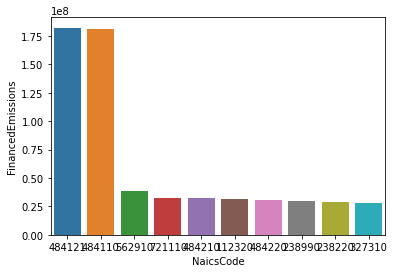

In [69]:
import seaborn as sns
sns.barplot(x = top10['NaicsCode'],y= top10['FinancedEmissions'])

<AxesSubplot:xlabel='NaicsCode', ylabel='FinancedEmissions'>

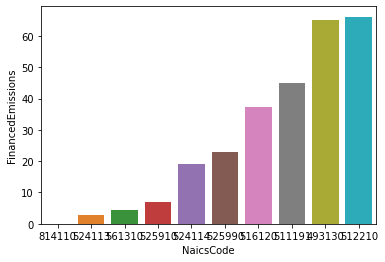

In [70]:
sns.barplot(x=bottom10['NaicsCode'], y=bottom10['FinancedEmissions'])

# Calculation of Averaged Emissions at all levels of industries

In [71]:
output=merged_df_2022.merge(df_MappingNewNew,on="NaicsCode").rename(columns={"AttributionFactor":"Revenue","FinancedEmissions":"Emissions","ImpactPotential_x": "ImpactPotential", "Quality_x": "Quality"})
output_new=output[['BorrName','NaicsCode','GrossApproval','SBAGuaranteedApproval','ImpactPotential','Quality','Revenue','Emissions','Impact','NaicsCode1','NaicsCode2','NaicsCode3','NaicsCode4','NaicsCode5','NaicsCode6']]
# Output file that includes company level 
output_new.to_csv('output.csv')
output_new

,BorrName,NaicsCode,GrossApproval,SBAGuaranteedApproval,ImpactPotential,Quality,Revenue,Emissions,Impact,NaicsCode1,NaicsCode2,NaicsCode3,NaicsCode4,NaicsCode5,NaicsCode6
0,#1 AUTO LIQUIDATORS LLC,441120,520000.0,390000.0,0.004307,3,520000.0,2239.683680,0.004307,4,44,441,4411,44112,441120
1,127 South River Drive LLC,441120,1349200.0,1011900.0,0.004307,3,1349200.0,5811.117733,0.004307,4,44,441,4411,44112,441120
2,13449 Van Nuys LLC,441120,952000.0,714000.0,0.004307,3,952000.0,4100.343968,0.004307,4,44,441,4411,44112,441120
3,5 G Property Holdings LLC,441120,680000.0,510000.0,0.004307,3,680000.0,2928.817120,0.004307,4,44,441,4411,44112,441120
4,786 Justice Car Dealer LLC,441120,500000.0,375000.0,0.004307,3,500000.0,2153.542000,0.004307,4,44,441,4411,44112,441120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30412,WHITEAKER ORCHARDS LLC,111339,10000.0,5000.0,0.245873,4,10000.0,2458.734530,0.245873,1,11,111,1113,11133,111339
30413,WIRELESS SOLUTIONS LLC,517122,3430000.0,2572500.0,0.000971,4,3430000.0,3332.100940,0.000971,5,51,517,5171,51712,517122
30414,Walton Ranch Inc.,488390,101000.0,85850.0,0.002098,3,101000.0,211.863862,0.002098,4,48,488,4883,48839,488390
30415,Wisco-N-Sin Beverage Group LL,311930,25000.0,12500.0,0.022438,6,25000.0,560.952550,0.022438,3,31,311,3119,31193,311930


In [72]:
naics['industry_code']=naics['industry_code'].astype(np.int64)
naics

,industry_code_old,industry_code,industry_title
0,10,10,"10 Total, all industries"
1,101,101,101 Goods-producing
2,1011,1011,1011 Natural resources and mining
3,1012,1012,1012 Construction
4,1013,1013,1013 Manufacturing
...,...,...,...
2496,99,99,NAICS 99 Unclassified
2497,999,999,NAICS 999 Unclassified
2498,9999,9999,NAICS 9999 Unclassified
2499,99999,99999,NAICS 99999 Unclassified


In [73]:
df2 = output_new.groupby(by='NaicsCode2').agg({'Revenue': 'sum', 'Emissions': 'sum'})
df2['FinancedEmissionsPerDollar'] = df2['Emissions']/df2['Revenue']
df2.sort_values(by=['FinancedEmissionsPerDollar'], ascending=False)
df2

,Revenue,Emissions,FinancedEmissionsPerDollar
NaicsCode2,,,
11,2.778591e+08,1.158361e+08,0.416888
21,6.609830e+07,1.681254e+07,0.254357
22,1.348950e+07,2.662964e+07,1.974101
23,1.409554e+09,1.674392e+08,0.118789
31,3.312277e+08,1.072963e+07,0.032394
32,2.959115e+08,5.346848e+07,0.180691
33,6.908662e+08,1.961838e+07,0.028397
42,9.464200e+08,3.270811e+06,0.003456
44,1.520469e+09,7.399253e+06,0.004866


In [52]:
df2=output_new[['NaicsCode2','Revenue','Emissions']].groupby('NaicsCode2').sum()
df2

,Revenue,Emissions
NaicsCode2,,
11,2.778591e+08,1.158361e+08
21,6.609830e+07,1.681254e+07
22,1.348950e+07,2.662964e+07
23,1.409554e+09,1.674392e+08
31,3.312277e+08,1.072963e+07
32,2.959115e+08,5.346848e+07
33,6.908662e+08,1.961838e+07
42,9.464200e+08,3.270811e+06
44,1.520469e+09,7.399253e+06


In [38]:
# Avg Impact values (or industrial emissions/revenue) at level 2
df2=output_new[['NaicsCode2','Revenue','Emissions']].groupby('NaicsCode2').sum()
df2=df2.reset_index().rename(columns={"NaicsCode2":"industry_code"})
df2=df2.merge(naics,on='industry_code')
df2=df2.groupby('industry_code_old').sum()
df2['Impact']=df2['Emissions']/df2['Revenue']
df2=df2.sort_values(by=['Impact'],ascending=False).drop(columns='industry_code')
df2=df2.merge(naics,how='inner',on='industry_code_old').drop(columns='industry_code').drop_duplicates()
df2=df2.reindex().rename(columns={"industry_code_old":"industry_code"})
df2

,industry_code,Revenue,Emissions,Impact,industry_title
0,22,1.348950e+07,2.662964e+07,1.974101,NAICS 22 Utilities
1,48-49,6.320810e+08,4.619725e+08,0.730875,NAICS 48-49 Transportation and warehousing
3,11,2.778591e+08,1.158361e+08,0.416888,"NAICS 11 Agriculture, forestry, fishing and hu..."
4,21,6.609830e+07,1.681254e+07,0.254357,"NAICS 21 Mining, quarrying, and oil and gas ex..."
5,56,6.369818e+08,1.222158e+08,0.191867,NAICS 56 Administrative and waste services
6,92,1.999500e+06,2.856166e+05,0.142844,NAICS 92 Public administration
7,23,1.409554e+09,1.674392e+08,0.118789,NAICS 23 Construction
8,31-33,1.318005e+09,8.381648e+07,0.063593,NAICS 31-33 Manufacturing
11,71,4.521112e+08,2.065491e+07,0.045685,"NAICS 71 Arts, entertainment, and recreation"
12,61,1.791074e+08,3.863544e+06,0.021571,NAICS 61 Educational services


In [39]:
# Avg Impact values (or industrial emissions/revenue) at level 3
df3=output_new[['NaicsCode3','Revenue','Emissions']].groupby('NaicsCode3').sum()
df3['Impact']=df3['Emissions']/df3['Revenue']
df3=df3.sort_values(by=['Impact'],ascending=False).reset_index().rename(columns={"NaicsCode3":"industry_code"})
df3=df3.merge(naics,on='industry_code').drop(columns='industry_code_old')
df3

,industry_code,Revenue,Emissions,Impact,industry_title
0,221,13489500.0,2.662964e+07,1.974101e+00,NAICS 221 Utilities
1,484,399319100.0,4.497146e+08,1.126204e+00,NAICS 484 Truck transportation
2,562,111218200.0,1.185614e+08,1.066025e+00,NAICS 562 Waste management and remediation ser...
3,481,6512900.0,4.434506e+06,6.808803e-01,NAICS 481 Air transportation
4,327,49263200.0,3.080870e+07,6.253897e-01,NAICS 327 Nonmetallic mineral product manufact...
...,...,...,...,...,...
88,517,36695600.0,2.801595e+04,7.634690e-04,NAICS 517 Telecommunications
89,511,13455100.0,6.652314e+03,4.944084e-04,"NAICS 511 Publishing industries, except internet"
90,524,202918800.0,8.460282e+04,4.169294e-04,NAICS 524 Insurance carriers and related activ...
91,525,13969400.0,2.461939e+02,1.762380e-05,"NAICS 525 Funds, trusts, and other financial v..."


In [40]:
# Avg Impact values (or industrial emissions/revenue) at level 4
df4=output_new[['NaicsCode4','Revenue','Emissions']].groupby('NaicsCode4').sum()
df4['Impact']=df4['Emissions']/df4['Revenue']
df4=df4.sort_values(by=['Impact'],ascending=False).reset_index().rename(columns={"NaicsCode4":"industry_code"})
df4=df4.merge(naics,on='industry_code').drop(columns='industry_code_old')
df4

,industry_code,Revenue,Emissions,Impact,industry_title
0,2211,4001700.0,2.119195e+07,5.295736e+00,NAICS 2211 Power generation and supply
1,1121,12428300.0,2.837547e+07,2.283134e+00,NAICS 1121 Cattle ranching and farming
2,3273,12719100.0,2.832533e+07,2.226992e+00,NAICS 3273 Cement and concrete product manufac...
3,1111,2953600.0,4.080857e+06,1.381655e+00,NAICS 1111 Oilseed and grain farming
4,2212,2956000.0,3.837311e+06,1.298143e+00,NAICS 2212 Natural gas distribution
...,...,...,...,...,...
286,5112,7766500.0,2.844333e+03,3.662310e-04,NAICS 5112 Software publishers
287,5241,3061000.0,5.842010e+02,1.908530e-04,NAICS 5241 Insurance carriers
288,5613,38715400.0,6.656687e+03,1.719390e-04,NAICS 5613 Employment services
289,5259,13969400.0,2.461939e+02,1.762380e-05,NAICS 5259 Other investment pools and funds


In [41]:
# Avg Impact values (or industrial emissions/revenue) at level 5
df5=output_new[['NaicsCode5','Revenue','Emissions']].groupby('NaicsCode5').sum()
df5['Impact']=df5['Emissions']/df5['Revenue']
df5=df5.sort_values(by=['Impact'],ascending=False).reset_index().rename(columns={"NaicsCode5":"industry_code"})
df5=df5.merge(naics,on='industry_code').drop(columns='industry_code_old')
df5

,industry_code,Revenue,Emissions,Impact,industry_title
0,32731,4478100.0,2.775714e+07,6.198418e+00,NAICS 32731 Cement manufacturing
1,22111,3836700.0,2.031815e+07,5.295736e+00,NAICS 22111 Electric power generation
2,22112,165000.0,8.737964e+05,5.295736e+00,NAICS 22112 Electric power transmission and di...
3,11211,4112500.0,1.028832e+07,2.501719e+00,"NAICS 11211 Beef cattle ranching, farming, and..."
4,11212,8315800.0,1.808715e+07,2.175034e+00,NAICS 11212 Dairy cattle and milk production
...,...,...,...,...,...
596,56133,2485000.0,4.272684e+02,1.719390e-04,NAICS 56133 Professional employer organizations
597,52591,392000.0,6.908530e+00,1.762380e-05,NAICS 52591 Open-end investment funds
598,52592,12281000.0,2.164379e+02,1.762380e-05,"NAICS 52592 Trusts, estates, and agency accounts"
599,52599,1296400.0,2.284749e+01,1.762380e-05,NAICS 52599 Other financial vehicles


In [42]:
# Avg Impact values (or industrial emissions/revenue) at level 6
df6=output_new[['NaicsCode6','Revenue','Emissions']].groupby('NaicsCode6').sum()
df6['Impact']=df6['Emissions']/df6['Revenue']
df6=df6.sort_values(by=['Impact'],ascending=False).reset_index().rename(columns={"NaicsCode6":'industry_code'})
df6=df6.merge(naics,on='industry_code').rename(columns={"industry_code":'NaicsCode'}).drop(columns='industry_code_old')
df6['NaicsCode']=df6['NaicsCode'].astype(str)
df6

,NaicsCode,Revenue,Emissions,Impact,industry_title
0,327310,4478100.0,2.775714e+07,6.198418e+00,NAICS 327310 Cement manufacturing
1,221114,2999100.0,1.588244e+07,5.295736e+00,NAICS 221114 Solar electric power generation
2,221122,130000.0,6.884457e+05,5.295736e+00,NAICS 221122 Electric power distribution
3,221121,35000.0,1.853508e+05,5.295736e+00,NAICS 221121 Electric bulk power transmission ...
4,221118,657600.0,3.482476e+06,5.295736e+00,NAICS 221118 Other electric power generation
...,...,...,...,...,...
802,561320,13290900.0,2.285224e+03,1.719390e-04,NAICS 561320 Temporary help services
803,525990,1296400.0,2.284749e+01,1.762380e-05,NAICS 525990 Other financial vehicles
804,525920,12281000.0,2.164379e+02,1.762380e-05,"NAICS 525920 Trusts, estates, and agency accounts"
805,525910,392000.0,6.908530e+00,1.762380e-05,NAICS 525910 Open-end investment funds


In [43]:
#output tables
df2.to_csv('df2.csv')
df3.to_csv('df3.csv')
df4.to_csv('df4.csv')
df5.to_csv('df5.csv')
df6.to_csv('df6.csv')